In [20]:
import matplotlib.pyplot as plt
from ggplot import *
import pandas as pd
from sklearn import metrics
import numpy as np

## Test data

In [25]:
y_true = [0, 1, 0,1,0,0,0,1]
y_pred = [0.25, 0.3, 0.77, 0.8, 0.1, 0.2, 0.5, 0.9]

## ROC Curve

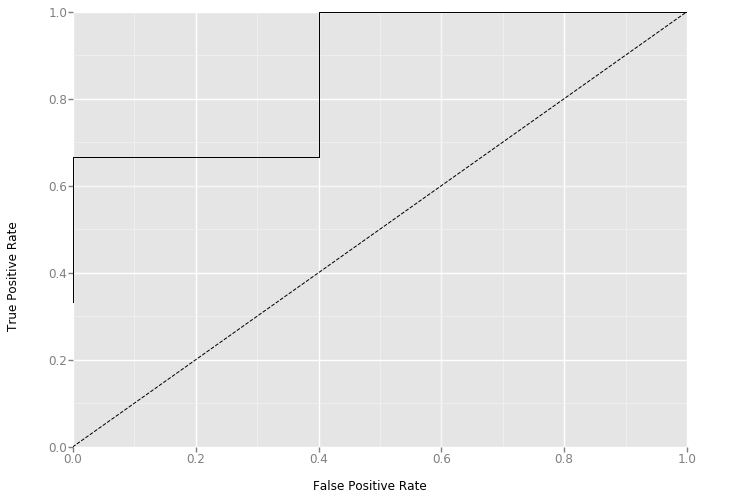

<ggplot: (7534588066)>

In [14]:
# Compute FPR and and TPR for all thresholds
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)

# Create ROC Curve object
roc_auc = metrics.auc(fpr, tpr)

#  Plot with ggplot
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed') + ylim(0,1) + xlim(0,1) + labs(x = "False Positive Rate", y = "True Positive Rate")

## Binary classifcation measures

In [43]:
# Class predictions
def get_labels(prob, z):
    class_labels = []
    for p in prob:
        if p < z:
            class_labels.append(0)
        else:
            class_labels.append(1)
    class_labels = np.asarray(class_labels)
    return class_labels
y_pred_labels = get_labels(y_pred, 0.5)
y_true_labels = np.asarray(y_true)

# Accuracy
acc = metrics.accuracy_score(y_true, y_pred_labels)

# Area under the curve
auc = metrics.roc_auc_score(y_true, y_pred)

# True Positive (TP)
tp = sum(np.logical_and(y_pred_labels == 1, y_true_labels == 1))
 
# True Negative (TN)
tn = sum(np.logical_and(y_pred_labels == 0, y_true_labels == 0))
 
# False Positive (FP)
fp = sum(np.logical_and(y_pred_labels == 1, y_true_labels == 0))
 
# False Negative (FN)
fn = sum(np.logical_and(y_pred_labels == 0, y_true_labels == 1))

# True Positive Rate
tpr = tp / (tp + fn)

# True Negative Rate
tnr = tn / (tn + fp)

# Positive Predictive Value
ppv = tp / (tp + fp)

# Negative Predictive Value
npv = tn / (tn + fn)


print(acc, acc, tp, tn, tp, fp, fn, tpr, tnr, ppv, npv)


0.625 0.625 2 3 2 2 1 0.6666666666666666 0.6 0.5 0.75
